<a href="https://colab.research.google.com/github/mahir21/finbert-practice-1.0/blob/main/LSTMTesting(5_12_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#numpy is imported to make scientific calculation , matplotlib is used for calculation and pandas is used for processing data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
stock_data = pd.read_csv('ACI_News.csv')

stock_data = stock_data['Post Date','Confidence_score_Positive','Confidence_score_Neutral']

stock_data ['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date',drop=True,inplace=True)

print(stock_data.head())
#DSE30_Input.csv()

KeyError: ignored

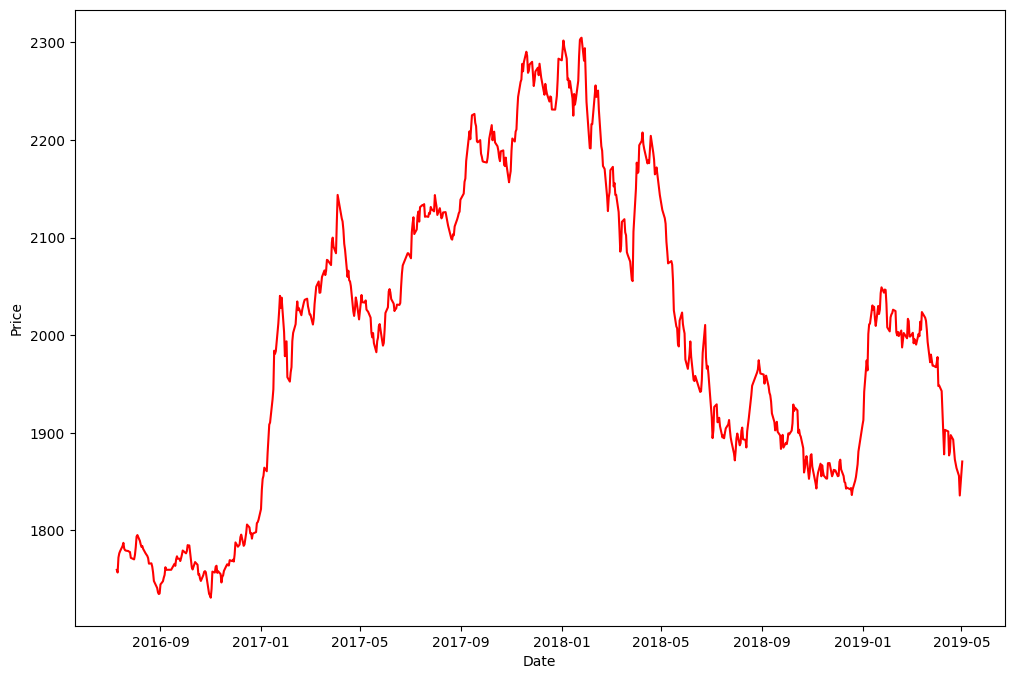

In [ ]:
#Plotting the values for predicting stock price
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Low'], label = 'close price', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
#plt.plot(stock_data.index, stock_data['Low'], label = 'close price', color = '')
plt.show()

In [ ]:
#Importing MinMaxScaler Value To Scale The Dataset So That 80% of data is used for training and remaining 20% is used for testing?
#Why are we using 80% data for training and 20% for testing?
#This stage is preprocessing the dataset
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
training_set_scaled = Ms.fit_transform(stock_data)
stock_data[stock_data.columns] = Ms.fit_transform(stock_data)
training_size = round(len(stock_data)*0.80)
training_data = stock_data[:training_size]
test_data = stock_data[training_size:]


In [ ]:
import numpy as np

def create_sequence(training_data):
    sequences = []
    labels = []
    start_idx = 0

    for stop_idx in range(50, len(training_data)):
        sequences.append(training_data.iloc[start_idx:stop_idx])
        labels.append(training_data.iloc[stop_idx])
        start_idx += 1

    return (np.array(sequences), np.array(labels))


In [ ]:
train_seq,train_label = create_sequence(training_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
#Implementation of the LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM , Bidirectional

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units = 50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()







Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
16/16 [==============================] - 6s 123ms/step - loss: 0.1253 - mean_absolute_error: 0.2753 - val_loss: 0.0108 - val_mean_absolut

In [ ]:

model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

test_predicted = model.predict(test_seq)

test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
16/16 [==============================] - 1s 72ms/step - loss: 7.1446e-04 - mean_absolute_error: 0.0206 - val_loss: 3.4825e-04 - val_mean_absolute_error: 0.0150
Epoch 2/80
16/16 [==============================] - 1s 50ms/step - loss: 7.4927e-04 - mean_absolute_error: 0.0212 - val_loss: 3.4998e-04 - val_mean_absolute_error: 0.0151
Epoch 3/80
16/16 [==============================] - 1s 47ms/step - loss: 7.2897e-04 - mean_absolute_error: 0.0212 - val_loss: 3.9518e-04 - val_mean_absolute_error: 0.0161
Epoch 4/80
16/16 [==============================] - 1s 47ms/step - loss: 6.9064e-04 - mean_absolute_error: 0.0206 - val_loss: 2.8766e-04 - val_mean_absolute_error: 0.0134
Epoch 5/80
16/16 [==============================] - 1s 50ms/step - loss: 8.3996e-04 - mean_absolute_error: 0.0225 - val_loss: 4.1970e-04 - val_mean_absolute_error: 0.0168
Epoch 6/80
16/16 [==============================] - 1s 68ms/step - loss: 8.1751e-04 - mean_absolute_error: 0.0225 - val_loss: 5.2654e-04 - val_me

In [ ]:
gs_slic_data = pd.concat([stock_data .iloc[-88:].copy(),pd.DataFrame(test_inverse_predicted,columns=['High_predicted','Low_predicted'],index=stock_data .iloc[-88:].index)], axis=1)

gs_slic_data[['High','Low']] = Ms.inverse_transform(gs_slic_data[['High','Low']])

gs_slic_data.head()



,High,Low,High_predicted,Low_predicted
Date,,,,
2016-11-17,1758.45,1758.45,1770.463989,1771.911987
2016-11-16,1753.80,1753.80,1767.850830,1769.378174
2016-11-15,1752.56,1752.56,1764.090210,1765.757080
2016-11-14,1746.64,1746.64,1761.255737,1763.030518
2016-11-13,1755.16,1755.16,1757.332764,1759.263306


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plt.plot(stock_data.index, stock_data['Low'], label = 'close price', color = 'red')
# plt.xlabel('Date')
# plt.ylabel('Price')
# #plt.plot(stock_data.index, stock_data['Low'], label = 'close price', color = '')
# plt.show()


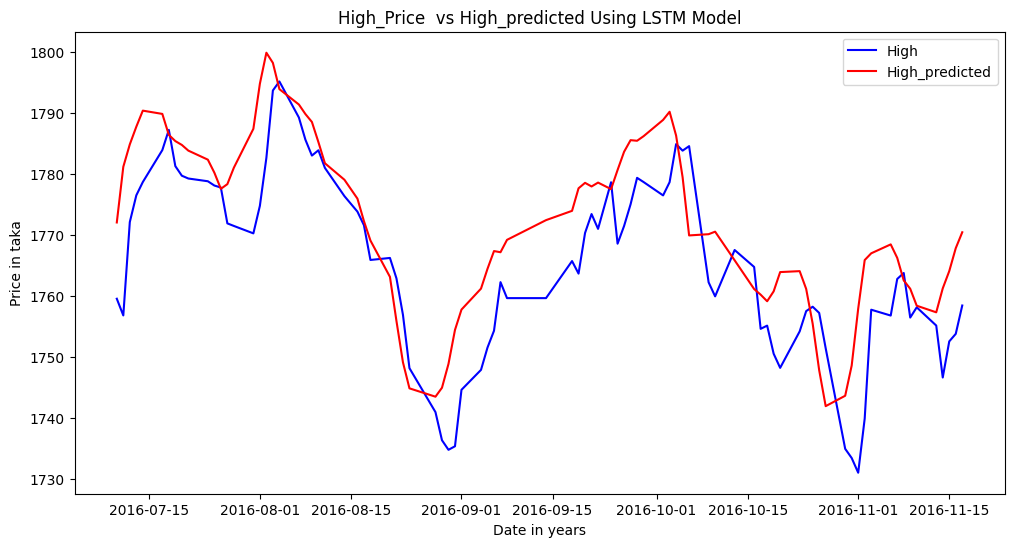

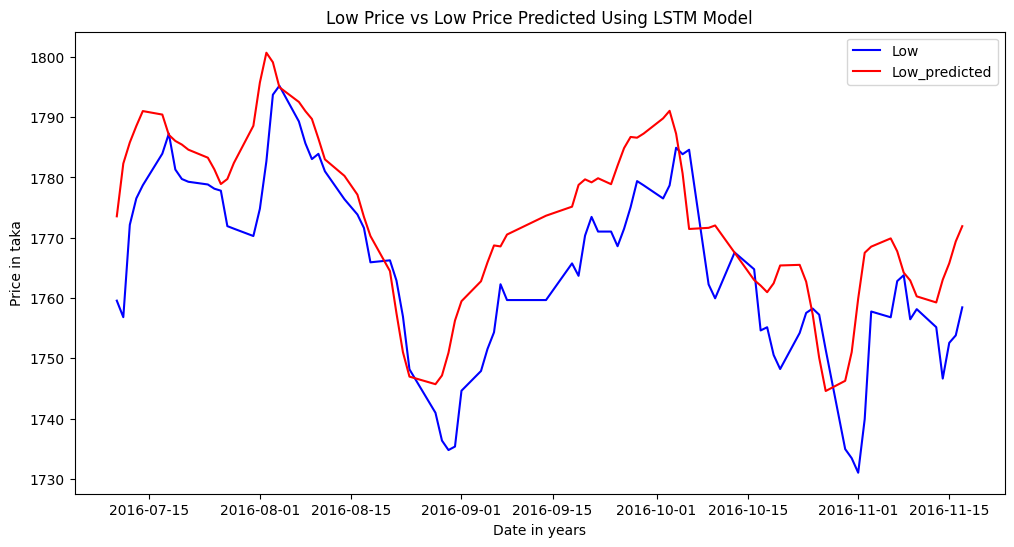

In [ ]:
import matplotlib.pyplot as plt

# Assuming gs_slic_data is the DataFrame containing your data

# Plot High and High_predicted on one graph
plt.figure(figsize=(12, 6))
plt.plot(gs_slic_data['High'], label='High', color = 'blue')
plt.plot(gs_slic_data['High_predicted'], label='High_predicted', color = 'red')
plt.title('High_Price  vs High_predicted Using LSTM Model')
plt.xlabel('Date in years')
plt.ylabel('Price in taka')
plt.legend()
plt.show()

# Plot Low and Low_predicted on another graph
plt.figure(figsize=(12, 6))
plt.plot(gs_slic_data['Low'], label='Low' , color = 'blue')
plt.plot(gs_slic_data['Low_predicted'], label='Low_predicted' , color = 'red')
plt.title('Low Price vs Low Price Predicted Using LSTM Model')
plt.xlabel('Date in years')
plt.ylabel('Price in taka')
plt.legend()
plt.show()
